<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/AP_final_cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df=pd.read_csv('/content/city_hour.csv' , parse_dates=['Datetime'])
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


# Preprocessing

In [ ]:
# Choose target city
city_name = "Delhi"
df = df[df['City'] == city_name].copy()
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN


In [ ]:
df.isnull().sum()

,0
City,0
Datetime,0
PM2.5,375
PM10,2421
NO,298
NO2,330
NOx,25
NH3,980
CO,364
SO2,2852


In [ ]:
required_cols = ['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Fill missing values using forward fill then backward fill
df[required_cols] = df[required_cols].fillna(method='ffill').fillna(method='bfill')


/tmp/ipython-input-160-4107429667.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[required_cols] = df[required_cols].fillna(method='ffill').fillna(method='bfill')


In [ ]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN


In [ ]:
df.describe()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,48192,48192.000000,45771.000000,48192.000000,48192.000000,48192.000000,48192.000000,48192.000000,48192.000000,48192.000000,48192.000000,48192.000000,48192.000000,47694.000000
mean,2017-10-01 00:30:00,117.082185,233.114669,39.026348,50.739087,58.574083,41.951152,1.976602,16.090384,51.293169,3.545895,17.180509,1.019427,260.148048
min,2015-01-01 01:00:00,0.050000,2.990000,0.050000,2.660000,0.000000,0.570000,0.000000,0.020000,0.060000,0.000000,0.000000,0.000000,22.000000
25%,2016-05-17 00:45:00,51.640000,125.205000,10.850000,30.140000,26.180000,29.650000,0.780000,9.620000,26.620000,1.500000,5.120000,0.000000,158.000000
50%,2017-10-01 00:30:00,86.890000,204.500000,19.100000,44.290000,42.515000,37.270000,1.100000,13.620000,43.370000,2.590000,11.550000,0.080000,258.000000
75%,2019-02-15 00:15:00,154.640000,313.630000,43.560000,64.722500,75.952500,48.740000,1.780000,20.270000,67.000000,4.580000,22.560000,1.140000,347.000000
max,2020-07-01 00:00:00,938.500000,1000.000000,497.400000,337.820000,433.780000,485.520000,47.420000,187.050000,497.620000,93.340000,162.000000,158.830000,762.000000
std,NaN,95.100319,141.873206,50.391683,28.095017,48.926770,20.341628,2.939733,10.156586,33.599415,3.225168,18.463716,3.240206,121.521666


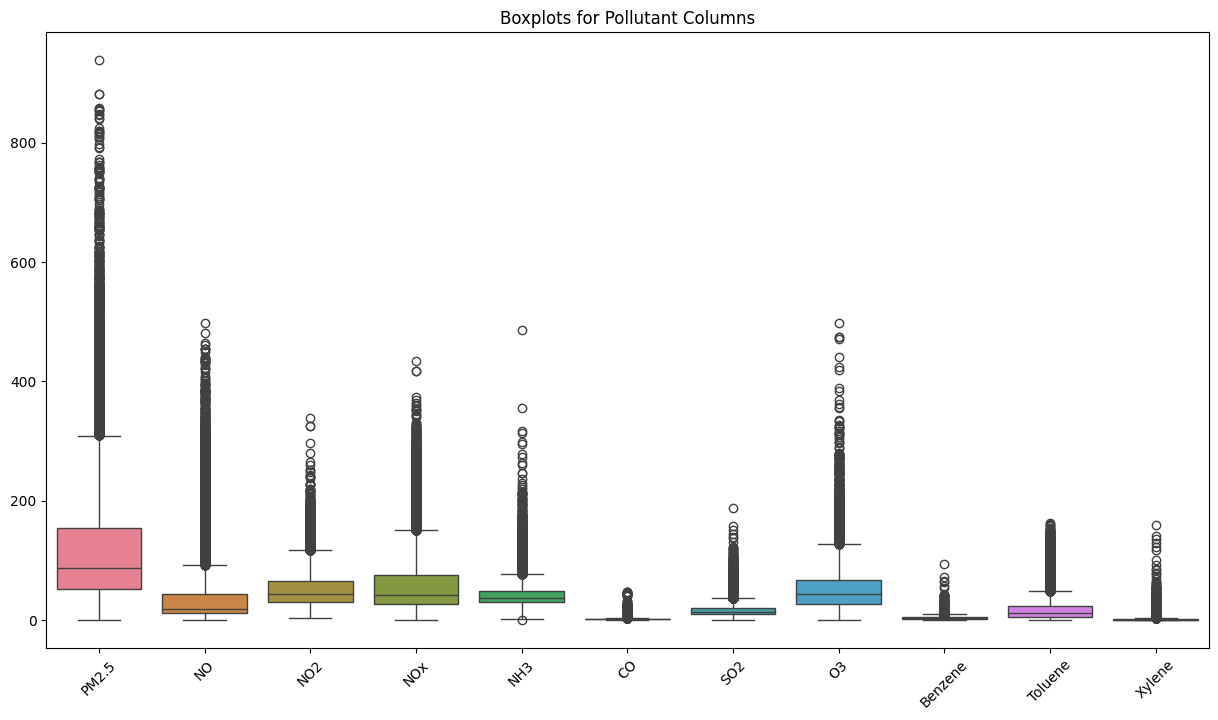

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[required_cols])
plt.title("Boxplots for Pollutant Columns")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Outlier removal using IQR
for col in required_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


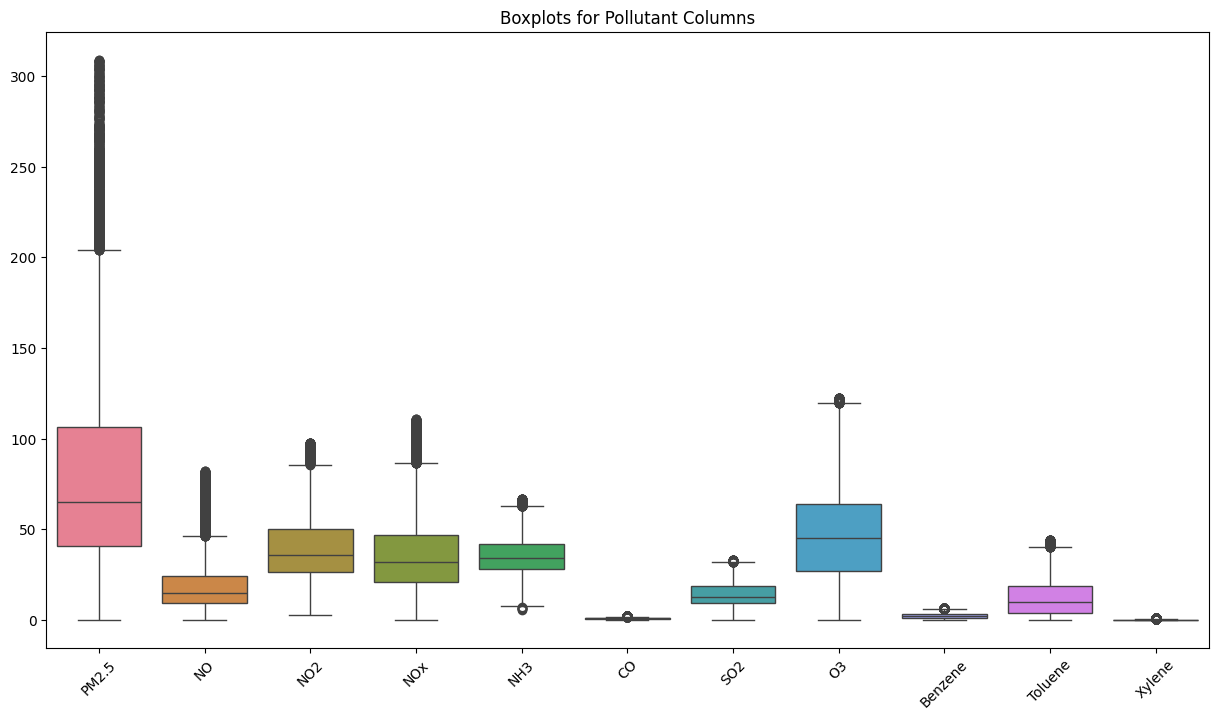

In [ ]:


 import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[required_cols])
plt.title("Boxplots for Pollutant Columns")
plt.xticks(rotation=45)
plt.show()


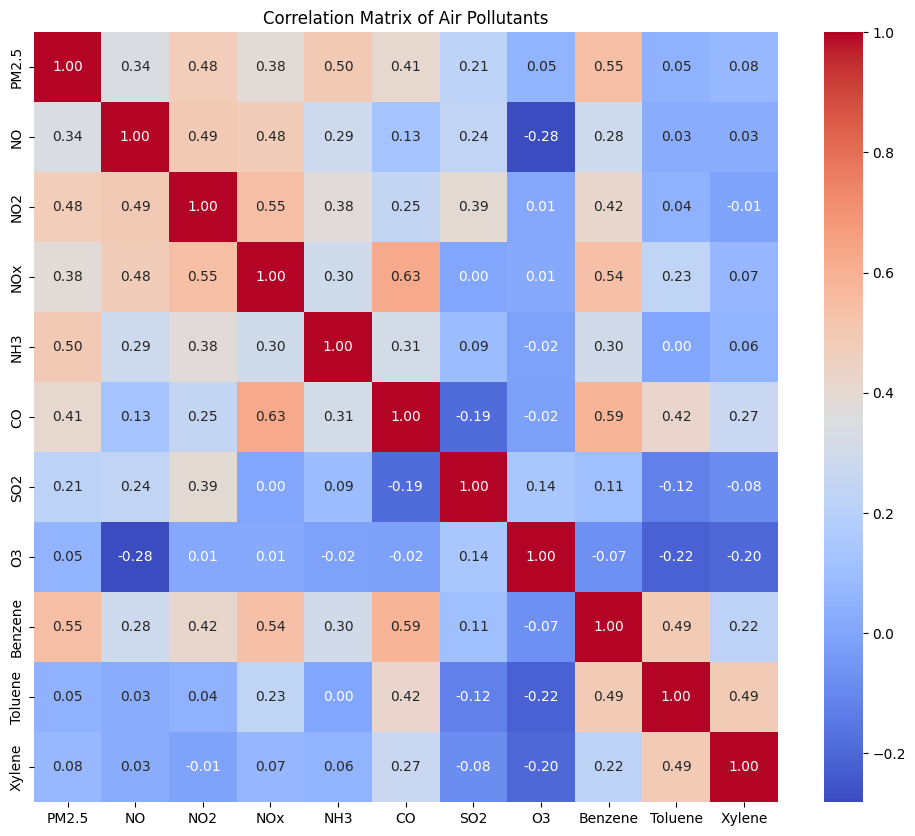

In [ ]:

import matplotlib.pyplot as plt
# Plot correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[required_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Air Pollutants")
plt.show()

# Time-Series Graph

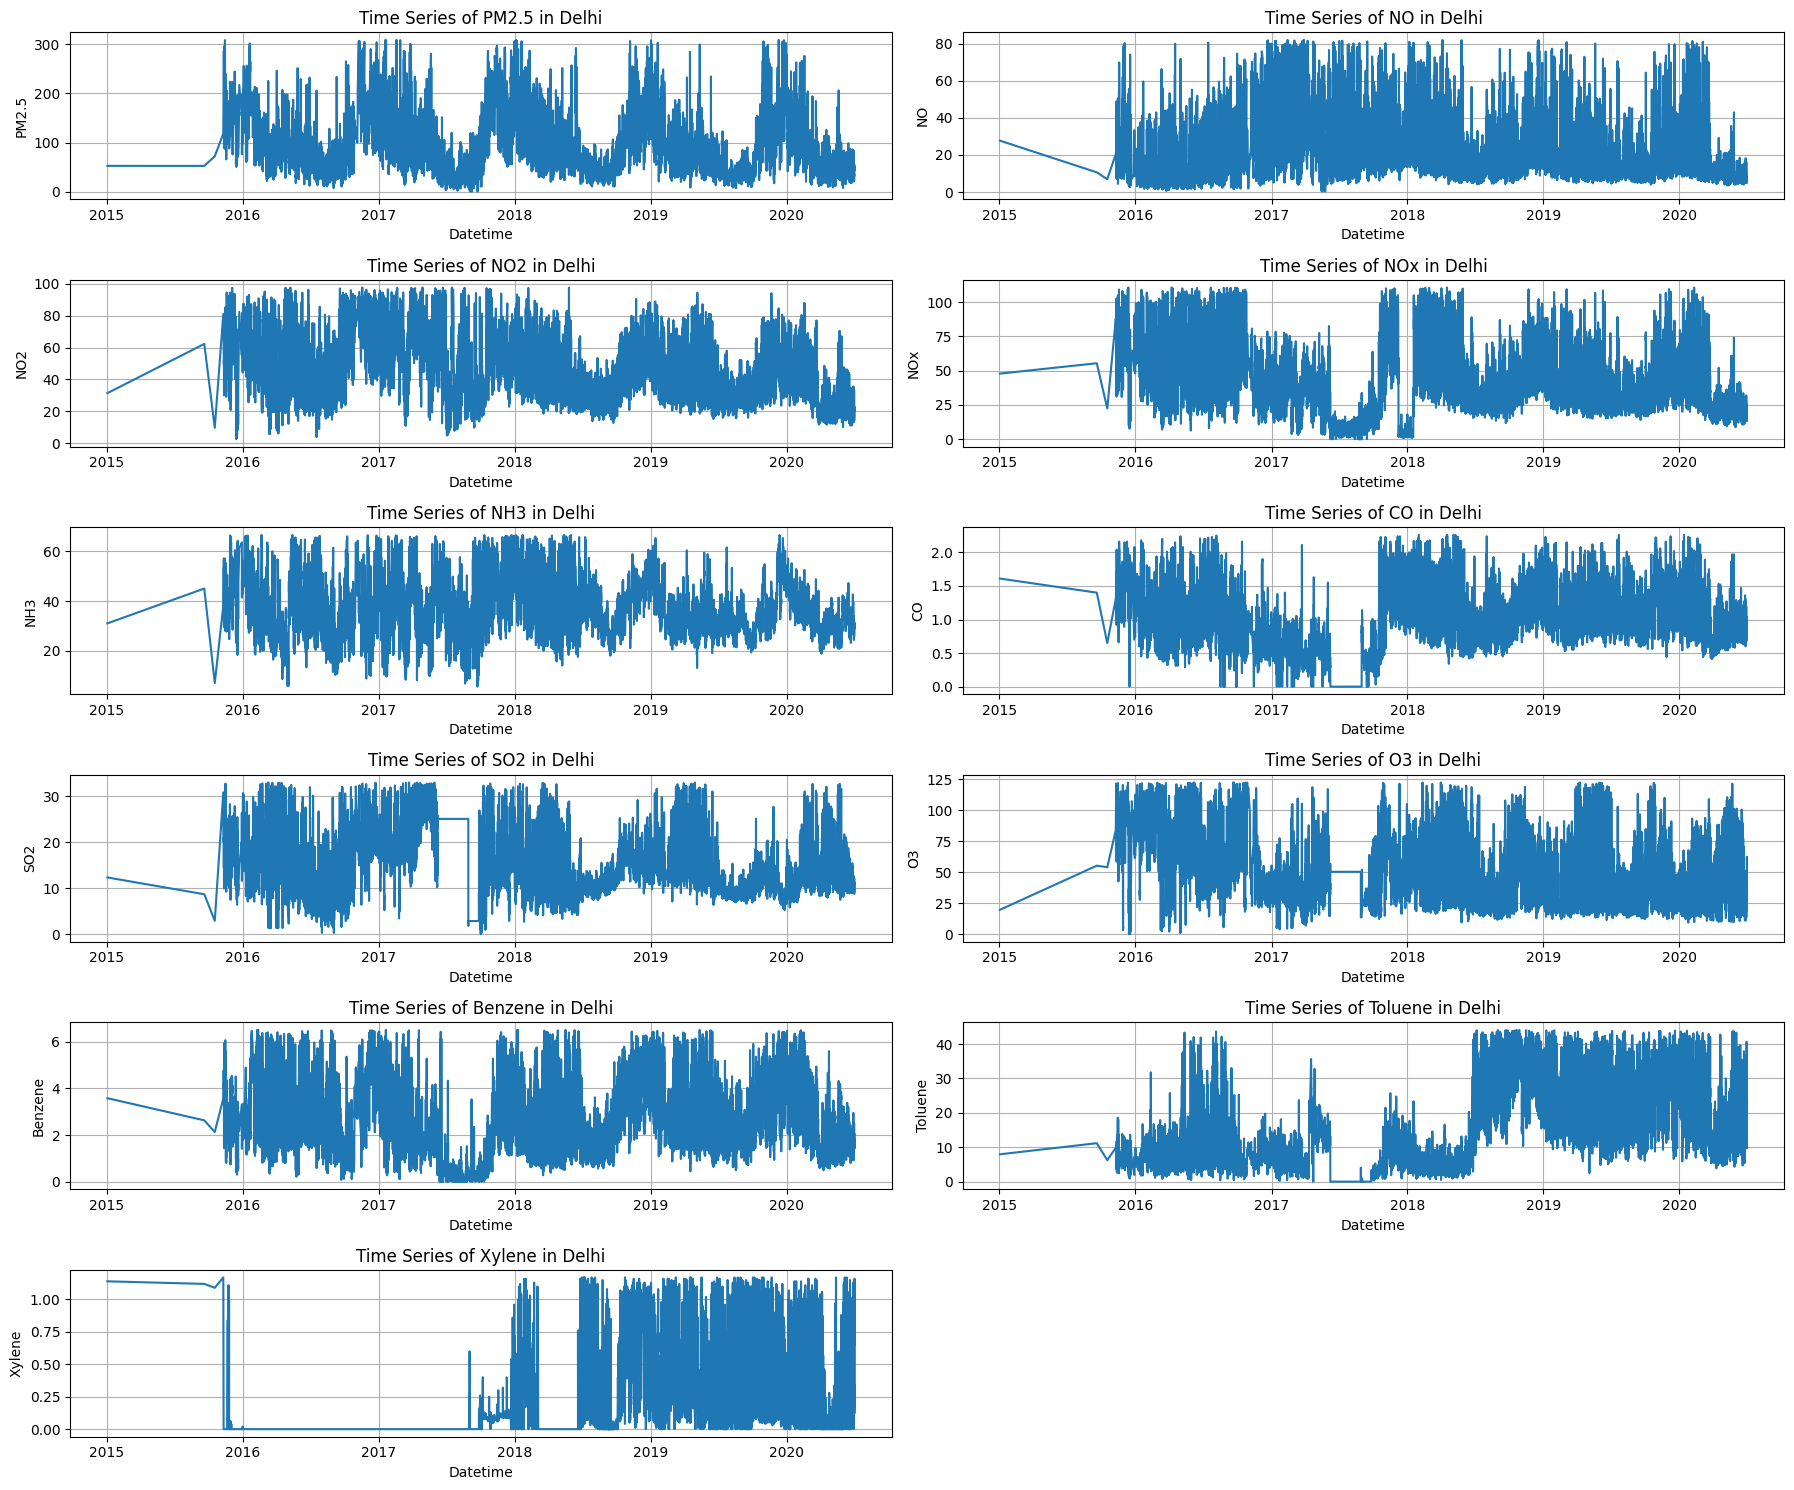

In [ ]:

import matplotlib.pyplot as plt
# Plot time series graphs for each pollutant
plt.figure(figsize=(18, 15))
for i, col in enumerate(required_cols):
    # matplotlib.pyplot.subplot(nrows, ncols, index)
    plt.subplot(len(required_cols) // 2 + len(required_cols) % 2, 2, i + 1)
    plt.plot(df['Datetime'], df[col])
    plt.title(f'Time Series of {col} in {city_name}')
    plt.xlabel('Datetime')
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Droping AQI and AQI Bucket , which will be calculated later
df.drop(columns=['AQI', 'AQI_Bucket'], inplace=True)

In [ ]:
# Time
df = df.sort_values('Datetime')
df.set_index('Datetime', inplace=True)

In [ ]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])  # Now City is an integer

In [ ]:
def get_subindex(conc, breakpoints):
    for (low, high, sub_low, sub_high) in breakpoints:
        if low <= conc <= high:
            return sub_low + ((conc - low) * (sub_high - sub_low)) / (high - low)
    return None  # For values outside defined range

In [ ]:
# Breakpoints per CPCB (example for a few pollutants)
breakpoints_pm25 = [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
                    (91, 120, 201, 300), (121, 250, 301, 400), (251, 380, 401, 500)]

breakpoints_pm10 = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
                    (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)]

breakpoints_no2 = [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
                   (181, 280, 201, 300), (281, 400, 301, 400), (401, 540, 401, 500)]

breakpoints_so2 = [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
                   (381, 800, 201, 300), (801, 1600, 301, 400), (1601, 2000, 401, 500)]

breakpoints_co = [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200),
                  (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)]

breakpoints_o3 = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200),
                  (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)]

In [ ]:
df['PM25_Index'] = df['PM2.5'].apply(lambda x: get_subindex(x, breakpoints_pm25))
df['PM10_Index'] = df['PM2.5'].apply(lambda x: get_subindex(x, breakpoints_pm10))  # Use 'PM10' if you include it
df['NO2_Index'] = df['NO2'].apply(lambda x: get_subindex(x, breakpoints_no2))
df['SO2_Index'] = df['SO2'].apply(lambda x: get_subindex(x, breakpoints_so2))
df['CO_Index'] = df['CO'].apply(lambda x: get_subindex(x, breakpoints_co))
df['O3_Index'] = df['O3'].apply(lambda x: get_subindex(x, breakpoints_o3))


In [ ]:
df['AQI'] = df[['PM25_Index', 'PM10_Index', 'NO2_Index', 'SO2_Index', 'CO_Index', 'O3_Index']].max(axis=1)

In [ ]:
def get_aqi_bucket(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

df['AQI_Bucket'] = df['AQI'].apply(get_aqi_bucket)

In [ ]:
features = ['PM2.5', 'NO', 'NO2', 'NOx', 'NH3',
            'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'
df = df[features + [target]]


In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

In [ ]:
def create_sequences(data, target_values, window_size=24):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target_values[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, df[target].values)

In [ ]:
# === Step 13: Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Simple RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Build and compile SimpleRNN model
rnn_model = Sequential([
    SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)   # regression output
])

rnn_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping:
# - monitor validation loss
# - patience of 10 epochs (stop if no improvement for 10 consecutive epochs)
# - restore the best weights seen during training
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train SimpleRNN model with EarlyStopping
history_rnn=rnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 32263.2188 - mae: 142.0355 - val_loss: 10402.4297 - val_mae: 81.2291
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 12664.4473 - mae: 93.4744 - val_loss: 10503.6348 - val_mae: 89.4714
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 12513.6582 - mae: 95.8615 - val_loss: 6987.2017 - val_mae: 61.5159
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 7366.0645 - mae: 66.1383 - val_loss: 2403.6863 - val_mae: 34.5695
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 3601.3406 - mae: 44.2698 - val_loss: 1803.3961 - val_mae: 30.0039
Epoch 6/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 3224.7859 - mae: 41.5752 - val_loss: 1395.7354 - val_mae: 24.2275
Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 3146.7847 - mae: 40.2601 - val_loss: 1883.8909 - val_mae: 34.3774
Epoch 8/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 2982.7354 - mae: 39.6618 - val_lo

In [ ]:
# Predict and evaluate SimpleRNN
rnn_preds = rnn_model.predict(X_test)
rnn_mae = mean_absolute_error(y_test, rnn_preds)
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_preds))

print(f"\nSimpleRNN Regression Metrics:")
print(f"MAE: {rnn_mae:.3f}")
print(f"RMSE: {rnn_rmse:.3f}")

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

SimpleRNN Regression Metrics:
MAE: 19.020
RMSE: 30.116


In [ ]:
# And for bucket‐based classification report:
rnn_pred_buckets = [get_aqi_bucket(v) for v in rnn_preds.flatten()]
print("\nSimpleRNN Classification Report:")
print(classification_report(y_true_buckets, rnn_pred_buckets))


SimpleRNN Classification Report:
              precision    recall  f1-score   support

        Good       0.58      0.82      0.68       624
    Moderate       0.69      0.81      0.75       983
        Poor       0.57      0.75      0.64       540
Satisfactory       0.86      0.72      0.78      2065
      Severe       0.00      0.00      0.00        69
   Very Poor       0.88      0.70      0.78       814

    accuracy                           0.74      5095
   macro avg       0.60      0.63      0.61      5095
weighted avg       0.75      0.74      0.74      5095



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# GRU

In [ ]:
# Build and compile GRU model with more capacity and dropout
from tensorflow.keras.layers import GRU, Dropout

gru_model = Sequential([
    GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)   # regression output
])

gru_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Training the GRU model with EarlyStopping
history_gru=gru_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,            # same here
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 32793.0664 - mae: 143.9774 - val_loss: 11069.1631 - val_mae: 78.6065
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 12903.5635 - mae: 91.9504 - val_loss: 10541.4736 - val_mae: 89.8876
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 11864.8428 - mae: 94.3094 - val_loss: 5679.7651 - val_mae: 60.1127
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 5866.4629 - mae: 59.1502 - val_loss: 2728.0562 - val_mae: 37.0471
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2875.6738 - mae: 38.7507 - val_loss: 1866.1396 - val_mae: 29.4621
Epoch 6/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 2269.1033 - mae: 33.1880 - val_loss: 1625.0770 - val_mae: 27.7334
Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 2067.3997 - mae: 30.6869 - val_loss: 1482.9048 - val_mae: 25.7595
Epoch 8/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 1896.2410 - mae: 28.8715 - val_loss

In [ ]:
# Make predictions
gru_preds = gru_model.predict(X_test)

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


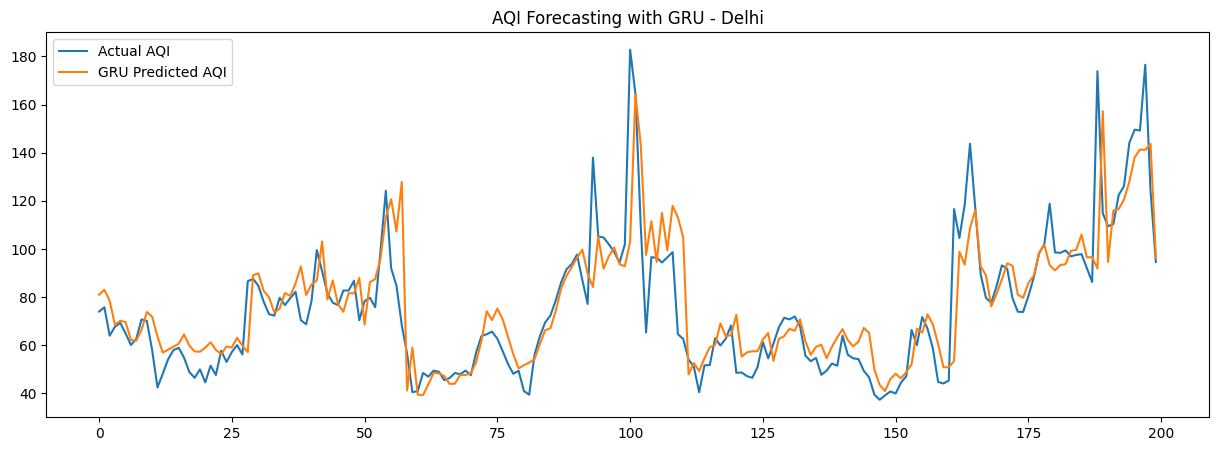

In [ ]:
# Plot GRU predictions
plt.figure(figsize=(15,5))
plt.plot(y_test[:200], label='Actual AQI')
plt.plot(gru_preds[:200], label='GRU Predicted AQI')
plt.legend()
plt.title(f"AQI Forecasting with GRU - {city_name}")
plt.show()

In [ ]:
# Evaluate GRU Model
gru_mae = mean_absolute_error(y_test, gru_preds)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_preds))
print(f"\nGRU Regression Metrics:")
print(f"GRU MAE: {gru_mae:.3f}")
print(f"GRU RMSE: {gru_rmse:.3f}")


GRU Regression Metrics:
GRU MAE: 17.075
GRU RMSE: 28.285


In [ ]:
# Convert continuous AQI values to AQI bucket labels
y_test_labels = [get_aqi_bucket(aqi) for aqi in y_test]
gru_pred_labels = [get_aqi_bucket(aqi) for aqi in gru_preds.flatten()]

# Print classification report
print("Classification Report for GRU Model:")
print(classification_report(y_test_labels, gru_pred_labels))

Classification Report for GRU Model:
              precision    recall  f1-score   support

        Good       0.71      0.68      0.70       624
    Moderate       0.69      0.78      0.73       983
        Poor       0.58      0.78      0.66       540
Satisfactory       0.84      0.80      0.82      2065
      Severe       0.72      0.19      0.30        69
   Very Poor       0.89      0.72      0.80       814

    accuracy                           0.76      5095
   macro avg       0.74      0.66      0.67      5095
weighted avg       0.77      0.76      0.76      5095



# LSTM

In [ ]:
# Build and compile LSTM model with more capacity and dropout
from tensorflow.keras.layers import Dropout

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64),                   # second LSTM layer
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)                    # regression output
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping:
# - monitor validation loss
# - patience of 10 epochs (stop if no improvement for 10 consecutive epochs)
# - restore the best weights seen during training
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Now re‑train your model with more epochs and EarlyStopping
history_lstm = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,           # increase from 10 to 100
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - loss: 31440.9102 - mae: 139.9838 - val_loss: 10388.8545 - val_mae: 81.3500
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 12864.0117 - mae: 94.4053 - val_loss: 10484.8730 - val_mae: 89.2591
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 12329.7119 - mae: 94.5454 - val_loss: 8996.2939 - val_mae: 74.8551
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 9760.5830 - mae: 79.8816 - val_loss: 6420.5737 - val_mae: 66.3467
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - loss: 6423.3481 - mae: 60.6315 - val_loss: 5275.3066 - val_mae: 60.0304
Epoch 6/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - loss: 5297.3789 - mae: 54.3835 - val_loss: 2740.0811 - val_mae: 39.3283
Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - loss: 3881.5176 - mae: 45.3755 - val_loss: 1848.0247 - val_mae: 29.6824
Epoch 8/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 3150.3921 - mae: 40.2652 - v

In [ ]:
preds = model.predict(X_test)


160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


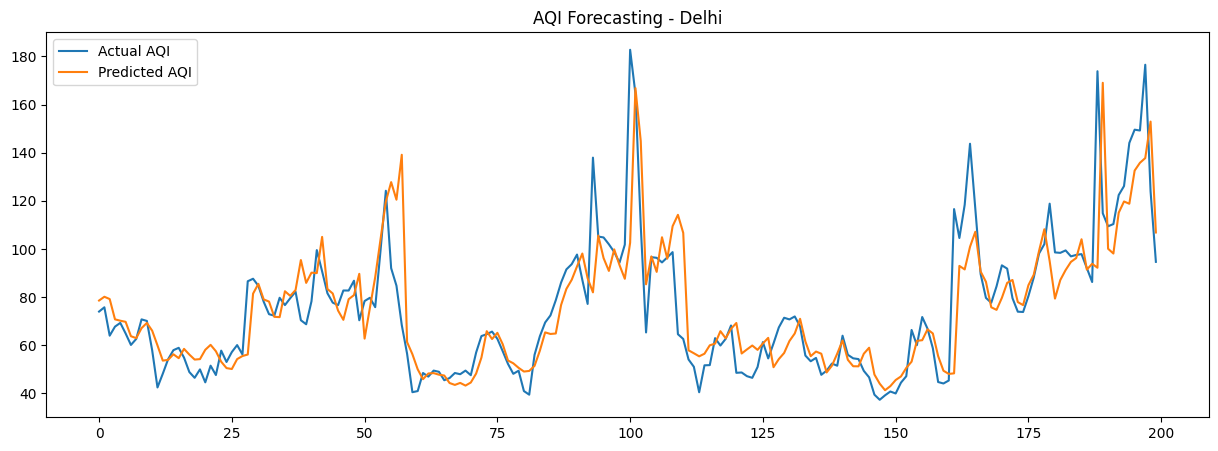

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test[:200], label='Actual AQI')
plt.plot(preds[:200], label='Predicted AQI')
plt.legend()
plt.title(f"AQI Forecasting - {city_name}")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

# === Calculate MAE and RMSE ===
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"Test MAE: {mae:.3f}")
print(f"Test RMSE: {rmse:.3f}")

Test MAE: 17.859
Test RMSE: 28.922


In [ ]:
# Re-use bucket function
def get_aqi_bucket(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

# Convert continuous predictions into categories
y_true_buckets = [get_aqi_bucket(val) for val in y_test]
y_pred_buckets = [get_aqi_bucket(val) for val in preds.flatten()]

# Generate classification report
print("\nClassification Report (based on AQI categories):")
print(classification_report(y_true_buckets, y_pred_buckets))



Classification Report (based on AQI categories):
              precision    recall  f1-score   support

        Good       0.66      0.65      0.65       624
    Moderate       0.68      0.77      0.72       983
        Poor       0.58      0.79      0.67       540
Satisfactory       0.83      0.77      0.80      2065
      Severe       0.00      0.00      0.00        69
   Very Poor       0.87      0.74      0.80       814

    accuracy                           0.74      5095
   macro avg       0.60      0.62      0.61      5095
weighted avg       0.75      0.74      0.74      5095



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Class: Severe
- Precision: 0.73 → Reasonably good at predicting Severe cases when it says so.

- Recall: 0.28 → Misses many actual Severe cases (low recall).

- F1-Score: 0.40 → Reflects imbalance between precision and recall.

# Summary

In [ ]:
from sklearn.metrics import accuracy_score

# 1. Compute regression metrics for each model
lstm_mae, lstm_rmse = mae, rmse
gru_mae, gru_rmse = gru_mae, gru_rmse
rnn_mae, rnn_rmse = rnn_mae, rnn_rmse

# 2. Compute “bucket” accuracy (simple accuracy_score) for each
lstm_acc   = accuracy_score(y_true_buckets, [get_aqi_bucket(v) for v in preds.flatten()])
gru_acc    = accuracy_score(y_true_buckets, [get_aqi_bucket(v) for v in gru_preds.flatten()])
rnn_acc    = accuracy_score(y_true_buckets, [get_aqi_bucket(v) for v in rnn_preds.flatten()])

# 3. Build a summary dict
summary = {
    'Model':   ['LSTM',    'GRU',    'SimpleRNN'],
    'MAE':     [lstm_mae,  gru_mae,  rnn_mae],
    'RMSE':    [lstm_rmse, gru_rmse, rnn_rmse],
    'Accuracy':[lstm_acc,  gru_acc,  rnn_acc]
}

# 4. Display as a DataFrame
import pandas as pd
df_summary = pd.DataFrame(summary)
print(df_summary)


       Model        MAE       RMSE  Accuracy
0       LSTM  17.858648  28.922425  0.742100
1        GRU  17.074561  28.285159  0.759372
2  SimpleRNN  19.019855  30.115730  0.736801


In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # MAE (or other regression metric)
    if 'mae' in history.history:
        plt.subplot(1, 2, 1)
        plt.plot(history.history['mae'], label='Train MAE')
        plt.plot(history.history['val_mae'], label='Val MAE')
        plt.title(f'{model_name} MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


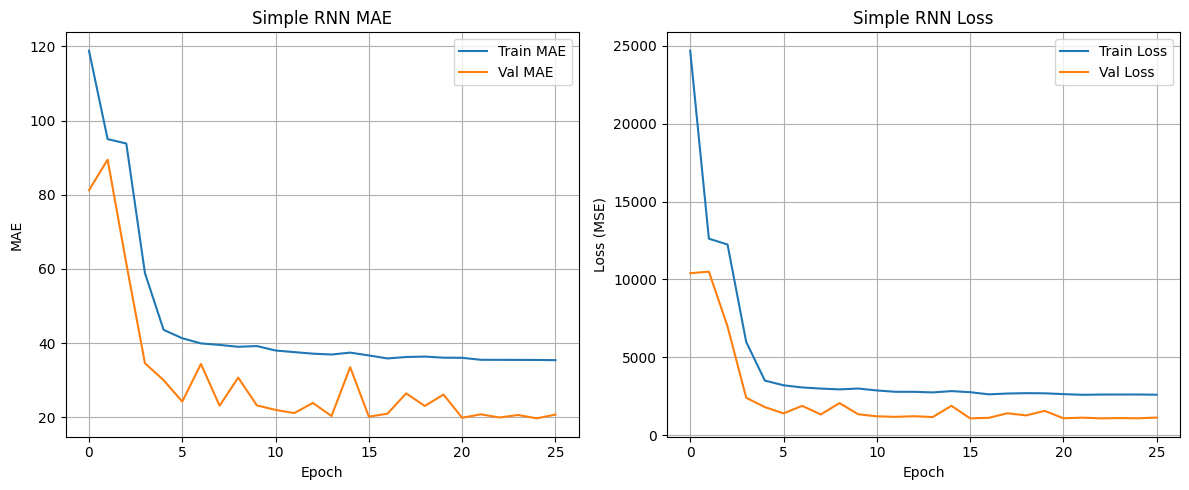

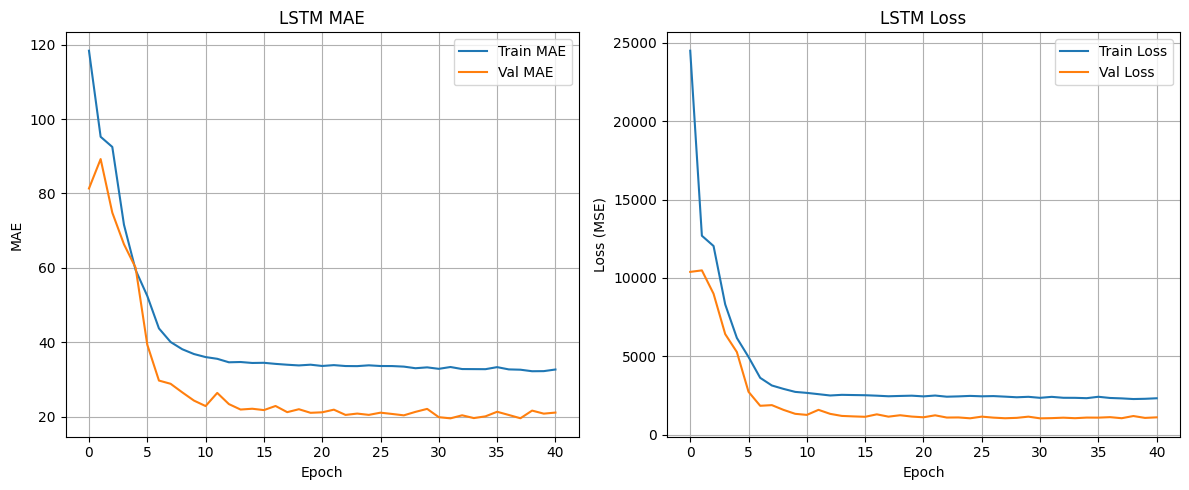

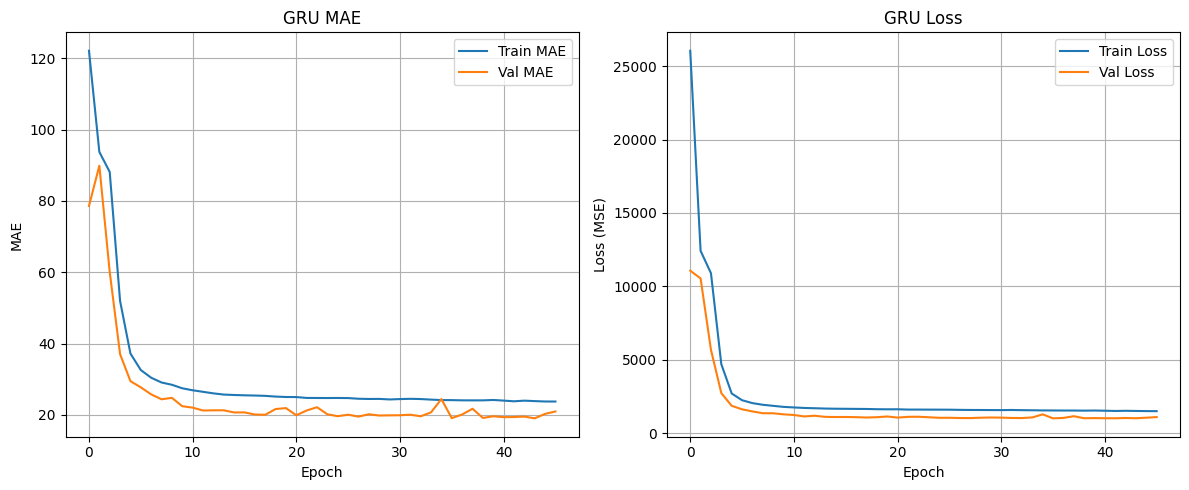

In [ ]:
plot_history(history_rnn, 'Simple RNN')
plot_history(history_lstm, 'LSTM')
plot_history(history_gru, 'GRU')

# Forecasting

/tmp/ipython-input-144-2492258387.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=25, freq='H')[1:]


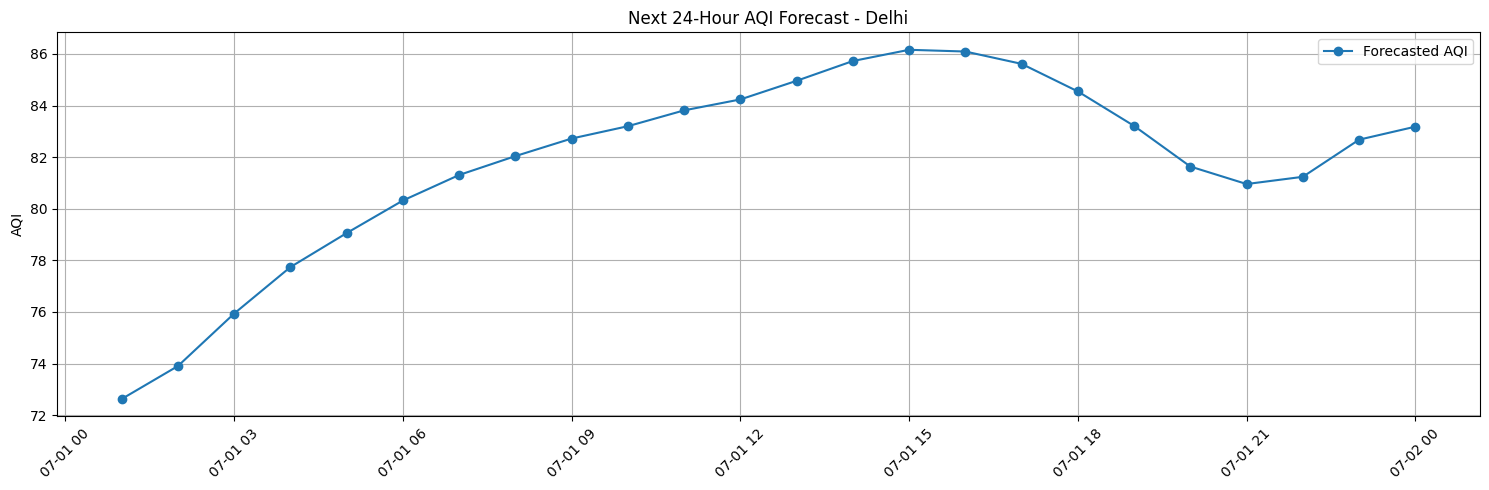

In [ ]:
# Forecasting the next 24 AQI values
last_input = scaled_features[-24:]  # Last 24 hours of features
future_preds = []

for _ in range(24):
    pred = model.predict(last_input.reshape(1, 24, -1), verbose=0)
    future_preds.append(pred[0][0])
    next_input = np.vstack([last_input[1:], last_input[-1]])  # hold pollutants steady
    last_input = next_input

# Create future time index
future_dates = pd.date_range(start=df.index[-1], periods=25, freq='H')[1:]

plt.figure(figsize=(15,5))
plt.plot(future_dates, future_preds, marker='o', label='Forecasted AQI')
plt.title(f"Next 24-Hour AQI Forecast - {city_name}")
plt.xticks(rotation=45)
plt.ylabel("AQI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
